In [ ]:
pip install torch torchvision

Import Libraries

In [22]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
from sklearn.manifold import TSNE
import numpy as np


In [4]:
numb_batch = 64

In [5]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_data = torchvision.datasets.MNIST('mnist_data', train = True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)


100%|██████████| 9912422/9912422 [00:00<00:00, 125818483.26it/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31108293.23it/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38265368.61it/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1854246.52it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



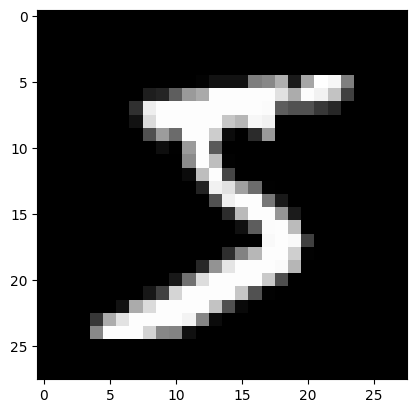

In [6]:
plt.imshow(train_data[0][0][0], cmap ='gray')

In [7]:
# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 4, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(4, 16, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening layer (identity matrix)
        self.flatten = nn.Identity()

        # MLP
        self.fc1 = nn.Linear(16 * 7 * 7, 49)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(49, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = self.flatten(x.view(-1, 16 * 7 * 7))
        x = self.relu3(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

# Set random seed for reproducibility
torch.manual_seed(42)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = MNIST('mnist_data', train=True, download=True, transform=transform)
test_dataset = MNIST('mnist_data', train=False, download=True, transform=transform)

In [9]:
# Select 100 images per class for training
indices = []
for i in range(10):
    indices += list(range(i * 600, i * 600 + 100))

# Create data loader for training
train_loader = DataLoader(dataset=train_dataset, batch_size=64, sampler=torch.utils.data.SubsetRandomSampler(indices))

# Create data loader for testing (use 10 images per class)
test_indices = []
for i in range(10):
    test_indices += list(range(i * 1000, i * 1000 + 10))
test_loader = DataLoader(dataset=test_dataset, batch_size=1, sampler=torch.utils.data.SubsetRandomSampler(test_indices))

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()

# (a) Vanilla SGD
optimizer_sgd = optim.SGD(model.parameters(), lr=0.001)

# (b) Momentum
optimizer_momentum = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# (c) RMSProp
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)

# Training loop
num_epochs = 15
train_errors_sgd, train_errors_momentum, train_errors_rmsprop = [], [], []
test_errors_sgd, test_errors_momentum, test_errors_rmsprop = [], [], []

for epoch in range(num_epochs):
# Training loop
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss_sgd = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer_sgd.zero_grad()
        loss_sgd.backward()
        optimizer_sgd.step()



In [11]:
    # Test the model after each epoch
    model.eval()
    with torch.no_grad():
        # Compute training errors
        train_errors_sgd.append(loss_sgd.item())

        # Compute test errors
        test_loss_sgd = 0.0

        for data, targets in test_loader:
            outputs = model(data)
            test_loss_sgd += criterion(outputs, targets).item()

        test_errors_sgd.append(test_loss_sgd / len(test_loader))


In [13]:
# RMSprop
for epoch in range(num_epochs):
# Training loop
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss_rmsprop = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer_rmsprop.zero_grad()
        loss_rmsprop.backward()
        optimizer_rmsprop.step()
    # Test the model after each epoch
    model.eval()
    with torch.no_grad():
        # Compute training errors
        train_errors_rmsprop.append(loss_rmsprop.item())

        # Compute test errors
        test_loss_rmsprop = 0.0

        for data, targets in test_loader:
            outputs = model(data)
            test_loss_rmsprop += criterion(outputs, targets).item()

        test_errors_rmsprop.append(test_loss_rmsprop / len(test_loader))


In [ ]:
# Momentum
for epoch in range(num_epochs):
# Training loop
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss_momentum = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer_momentum.zero_grad()
        loss_momentum.backward()
        optimizer_momentum.step()
    # Test the model after each epoch
    model.eval()
    with torch.no_grad():
        # Compute training errors
        train_errors_momentum.append(loss_momentum.item())

        # Compute test errors
        test_loss_momentum = 0.0

        for data, targets in test_loader:
            outputs = model(data)
            test_loss_momentum += criterion(outputs, targets).item()

        test_errors_momentum.append(test_loss_momentum / len(test_loader))


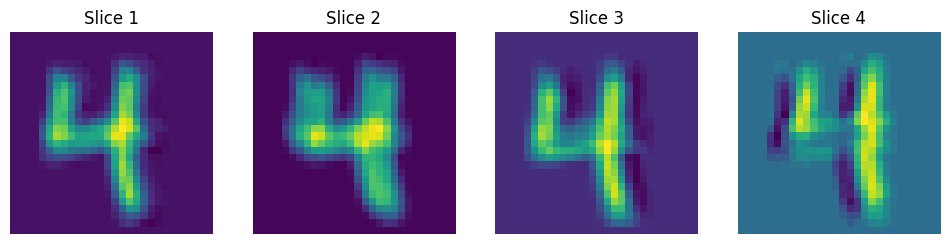

In [19]:
def visualize_activation_maps(data, model, layer_idx):
    activations = []
    def hook(module, input, output):
        activations.append(output)

    hook_handle = model.conv1.register_forward_hook(hook) if layer_idx == 1 else model.conv2.register_forward_hook(hook)

    model.eval()
    with torch.no_grad():
        _ = model(data)

    hook_handle.remove()
    activation_maps = activations[0].squeeze().cpu().numpy()

    # Visualize a few slices
    num_slices = min(4, activation_maps.shape[0])
    fig, axes = plt.subplots(1, num_slices, figsize=(12, 3))

    for i in range(num_slices):
        axes[i].imshow(activation_maps[i], cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Slice {i + 1}')

    plt.show()

# Visualize activation maps for a few test samples
for data, _ in test_loader:
    visualize_activation_maps(data, model, layer_idx=1)  # Choose 1 for conv1 or 2 for conv2
    break

In [20]:
def compute_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        model.eval()
        for data, targets in loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = correct / total
    return accuracy

# Report accuracy
train_accuracy = compute_accuracy(train_loader, model)
test_accuracy = compute_accuracy(test_loader, model)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%')


Training Accuracy: 79.30%, Test Accuracy: 78.00%


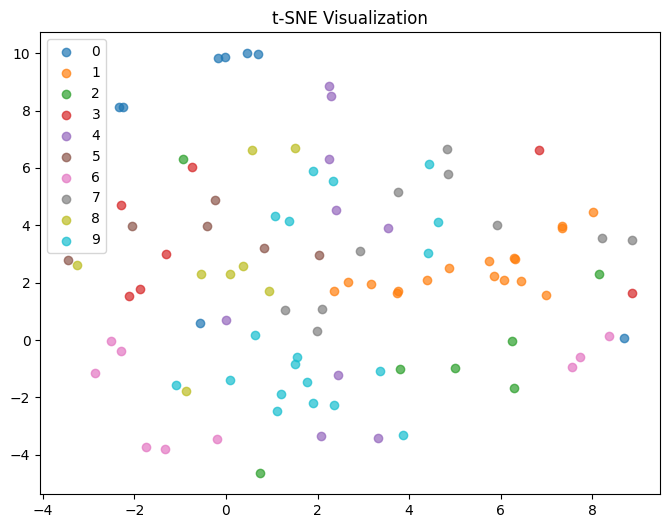

In [23]:
def apply_tsne(model, loader):
    model.eval()
    features = []
    labels = []

    with torch.no_grad():
        for data, targets in loader:
            output = model(data)
            features.append(model.fc1(data.view(-1, 16 * 7 * 7)).cpu().numpy())
            labels.append(targets.item())

    features = np.vstack(features)
    tsne_result = TSNE(n_components=2).fit_transform(features)

    plt.figure(figsize=(8, 6))
    for i in range(10):
        indices = np.where(np.array(labels) == i)[0]
        plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], label=str(i), alpha=0.7)
    plt.title('t-SNE Visualization')
    plt.legend()
    plt.show()

# Apply tSNE for the first epoch
model = CNN()
optimizer_sgd_tsne = optim.SGD(model.parameters(), lr=0.001)
for epoch in range(num_epochs):
# Training loop
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss_sgd_tsne = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer_sgd_tsne.zero_grad()
        loss_sgd_tsne.backward()
        optimizer_sgd_tsne.step()
apply_tsne(model, test_loader)


In [29]:
# Apply dropout to the MLP
class CNNWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(CNNWithDropout, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 4, kernel_size=5, stride=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(4, 16, kernel_size=5, stride=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening layer (identity matrix)
        self.flatten = nn.Identity()

        # MLP with dropout
        self.fc1 = nn.Linear(16 * 5 * 5, 49)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(49, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.dropout(x))
        x = self.softmax(x)
        return x

# Instantiate the model with dropout
model_dropout = CNNWithDropout(dropout_rate=0.5)

# Choose an optimizer and criterion for training
optimizer_dropout = optim.RMSprop(model_dropout.parameters(), lr=0.001, alpha=0.9)

# Train the model with dropout
train_errors_dropout, test_errors_dropout = [],[]

for epoch in range(num_epochs):
# Training loop
    model_dropout.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model_dropout(data)
        loss_dropout = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer_dropout.zero_grad()
        loss_dropout.backward()
        optimizer_dropout.step()
    # Test the model after each epoch
    model.eval()
    with torch.no_grad():
        # Compute training errors
        train_errors_dropout.append(loss_dropout.item())

        # Compute test errors
        test_loss_dropout = 0.0

        for data, targets in test_loader:
            outputs = model(data)
            test_loss_dropout += criterion(outputs, targets).item()

        test_errors_dropout.append(test_loss_dropout / len(test_loader))

# Apply batch normalization to the MLP
class CNNWithBatchNorm(nn.Module):
    def __init__(self):
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 4, kernel_size=5, stride=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(4, 16, kernel_size=5, stride=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening layer (identity matrix)
        self.flatten = nn.Identity()

        # MLP with batch normalization and dropout
        self.fc1 = nn.Linear(16 * 7 * 7, 49)
        self.batch_norm = nn.BatchNorm1d(49)
        self.dropout = nn.Dropout(p=0.2)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(49, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = self.flatten(x.view(-1, 16 * 5 * 5))
        x = self.relu3(self.dropout(self.batch_norm(self.fc1(x))))
        x = self.softmax(self.fc2(x))
        return x

# Instantiate the model with batch normalization
model_batchnorm = CNNWithBatchNorm()

# Choose an optimizer and criterion for training
optimizer_batchnorm = optim.RMSprop(model_batchnorm.parameters(), lr=0.001, rho=0.9)

# Train the model with batch normalization
train_errors_batchnorm, test_errors_batchnorm = [],[]

for epoch in range(num_epochs):
# Training loop
    model_batchnorm.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model_batchnorm(data)
        loss_batchnorm = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer_batchnorm.zero_grad()
        loss_batchnorm.backward()
        optimizer_batchnorm.step()

      # Test the model after each epoch
    model.eval()
    with torch.no_grad():
        # Compute training errors
        train_errors_batchnorm.append(loss_batchnorm.item())

        # Compute test errors
        test_loss_batchnorm = 0.0

        for data, targets in test_loader:
            outputs = model(data)
            test_loss_batchnorm += criterion(outputs, targets).item()

        test_errors_batchnorm.append(test_loss_batchnorm / len(test_loader))


RuntimeError: ignored